In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os

In [2]:
# definindo diretórios e classes
base_dir = 'drive/MyDrive/binary_dataset'

test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

test_0_dir = os.path.join(test_dir, '0')
test_1_dir = os.path.join(test_dir, '1')

train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')

validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')

In [ ]:
class_type = {0:'0',  1:'1'}

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale =  1.0/255.)
train_datagen = ImageDataGenerator(rescale =  1.0/255.)
validation_datagen = ImageDataGenerator(rescale =  1.0/255.)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  color_mode='rgb',
                                                  target_size=(224, 224))

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    color_mode='rgb',
                                                    target_size=(224, 224))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              color_mode='rgb',
                                                              target_size=(224, 224))

Found 1656 images belonging to 2 classes.
Found 15063 images belonging to 2 classes.
Found 826 images belonging to 2 classes.


In [ ]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(224,224,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                  validation_data=test_generator,
                  steps_per_epoch=100,
                  epochs=6,
                  verbose=1)

Epoch 1/6
100/100 [==============================] - 1991s 20s/step - loss: 0.7247 - acc: 0.6326 - val_loss: 0.7172 - val_acc: 0.5646
Epoch 2/6
100/100 [==============================] - 1978s 20s/step - loss: 0.6439 - acc: 0.6696 - val_loss: 0.6938 - val_acc: 0.5646
Epoch 3/6
100/100 [==============================] - 1984s 20s/step - loss: 0.6487 - acc: 0.6610 - val_loss: 0.7252 - val_acc: 0.5646
Epoch 4/6
100/100 [==============================] - 1991s 20s/step - loss: 0.6504 - acc: 0.6600 - val_loss: 0.6888 - val_acc: 0.5646
Epoch 5/6
100/100 [==============================] - 2015s 20s/step - loss: 0.6445 - acc: 0.6649 - val_loss: 0.6960 - val_acc: 0.5646
Epoch 6/6
100/100 [==============================] - 1964s 20s/step - loss: 0.6418 - acc: 0.6629 - val_loss: 0.6901 - val_acc: 0.5646


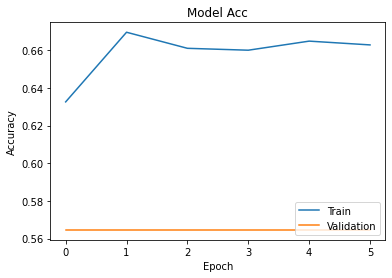

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

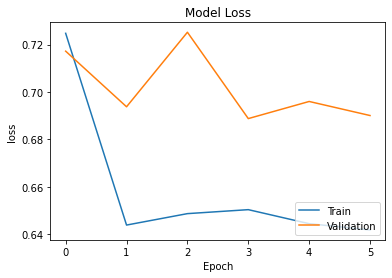

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model.save('drive/MyDrive/models/cnn_resnet_bin.h5')

In [ ]:
model.evaluate(test_generator)

83/83 [==============================] - 280s 3s/step - loss: 0.6853 - acc: 0.5652


[0.6853330135345459, 0.5652173757553101]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224, 224, 3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

In [ ]:
def test_model(path):
    img = get_img_array(path)

    res = class_type[np.argmax(model.predict(img))]
    print(f"The given X-Ray image is of type = {res}")
    print()

    plt.imshow(img[0]/255, cmap = "gray")
    plt.title("input image")
    plt.show()

1/1 [==============================] - 0s 361ms/step
The given X-Ray image is of type = 0



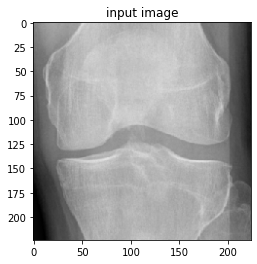

In [ ]:
test_model('/content/drive/MyDrive/binary_dataset/test/1/9225063L.png')

In [4]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/models/cnn_resnet_bin.h5')

In [6]:
classes_name = ('0','1')
height, width = (224, 224)
test_dataset = test_datagen.flow_from_directory(test_dir, 
                                                target_size = (height, width), 
                                                classes = classes_name, 
                                                batch_size = 20, 
                                                shuffle = False)


test_set = test_dataset
test_set.reset()
predictions = new_model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=-1)

y_test = test_dataset.labels
cm = confusion_matrix(y_test,y_pred)
cm2 = classification_report(test_dataset.classes, y_pred)


print(classification_report(test_dataset.classes, y_pred))


file = open('time_categorial_metrics.txt', 'w')
file.write('tempo %s' % cm2)
file.close()

Found 1656 images belonging to 2 classes.
83/83 [==============================] - 234s 3s/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       935
           1       0.00      0.00      0.00       721

    accuracy                           0.56      1656
   macro avg       0.28      0.50      0.36      1656
weighted avg       0.32      0.56      0.41      1656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat